# Hackathon Example

Das Ziel des Hackathons ist, Energiedaten zu kombinieren und interessante Resultate zu visualisieren. Dazu verwenden wir am besten Jupyter Notebooks wie dieses hier.

In einem Notebook können wir Markdown-Code mit Python kombinieren, die einzelnen Code-Blöcke immer wieder anpassen, und die Resultate direkt modifizieren.

## Tools

### Python
Selbstredend.

### Jupyter Notebook Extension

Extension von Visual Studio Code. [Hier installieren](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter).

### Bibliotheken
####  matplotlib (pyplot)
Eine Python-Bibliothek (also eine Sammlung von Funktionen), um mit Python schöne Grafiken zu erstellen.
#### Pandas
Data-Science Bibliothek
#### Folium
Geo-Visualisierungstools

Generell lassen sich gängige Bibliotheken vom Terminal mit `pip` installieren
```bash
python -m pip install matplotlib pandas folium
```
Wir können alternativ aber auch einfach sicherstellen, dass der _Kernel_, der den Python-Code dieses Notebooks ausführt, die Bibliotheke installiert hat:

In [1]:
import sys
!{sys.executable} -m pip install matplotlib pandas folium geopandas geopy plotly.express

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


## Comma-Separated Values

Wir wollen die öffentlich verfügbaren Datensätze verarbeiten. Die tabellarischen Daten liegen oft im CSV-Format (Comma-Separated Values) vor. Dabei repräsentiert jede Zeile ein Eintrag, wobei die Werte der einzelnen Spalten mit Kommas (manchmal auch Semikolons) abgetrennt sind. Enthält ein Wert ein Komma, kann der Wert in Anführungszeichen eingeschlossen sein. Die erste Zeile enthält oft die Spaltennamen:

```
Postleitzahl,Ort,Einwohner
8590,Romanshorn,11296
8580,Amriswil,14157
9320,Arbon,14872
```

Wir verwenden gleich die Pandas-Bibliothek, um CSV zu lesen.

Zum Beispiel möchten wir mit den Daten zur Energieproduktion der Thurgauer Gemeinden arbeiten. Das Dataset findet sich unter https://data.tg.ch/explore/dataset/div-energie-10/table/, den Link zum CSV-Download findet sich unter _Exporte_. Der Download verwendet Semikolons.

Die Spaltennamen entnehmen wir ebenfalls der Webseite, um die Gemeinde und deren Energieproduktion zu erhalten.

In [2]:
import pandas as pd

source = 'https://data.tg.ch/api/explore/v2.1/catalog/datasets/div-energie-10/exports/csv'

# CSV-Daten mit Pandas lesen.
# Achtung: wir verwenden Semikolons statt Kommas als Trennzeichen.
# header=0 teilt der Funktion mit, dass wir Spaltenheader in der Datei erwarten.
energy_dataset = pd.read_table(source, sep=';', header=0)
# Wie sehen die Daten aus?
energy_dataset

,jahr,bfs_nr_gemeinde,gemeinde_name,einwohner,wasserkraft,biomasse_holz,biogasanlagen_landwirtschaft,kehricht,biogasanlagen_industrie,biogasanlagen_abwasser,photovoltaik,wind,total
0,2020,4881,Amlikon-Bissegg,1329,NaN,NaN,3.894,NaN,NaN,NaN,4.366,NaN,8.260
1,2020,4461,Amriswil,14157,NaN,NaN,NaN,NaN,NaN,NaN,5.061,NaN,5.061
2,2020,4891,Berg (TG),3420,NaN,NaN,0.730,NaN,NaN,NaN,2.475,0.005,3.210
3,2020,4901,Birwinken,1330,NaN,NaN,NaN,NaN,NaN,NaN,0.971,NaN,0.971
4,2020,4471,Bischofszell,5878,2.813,NaN,NaN,NaN,NaN,1.336,2.102,NaN,6.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2015,4871,Wagenhausen,1672,NaN,NaN,NaN,NaN,NaN,NaN,0.259,NaN,0.259
476,2015,4946,Weinfelden,11147,8.266,NaN,NaN,39.873,NaN,0.474,2.011,NaN,50.624
477,2015,4951,Wigoltingen,2369,NaN,NaN,0.398,NaN,NaN,NaN,1.254,NaN,1.652
478,2015,4791,Wuppenau,1120,NaN,NaN,NaN,NaN,NaN,NaN,0.720,NaN,0.720


Für den Anfang interessieren uns nur die Werte 2020. Zudem möchten wir nur die Gemeinde und die totale Energieproduktion.

Filtern können wir die Daten, indem wir ein Bool-Array übergeben, das die gleiche Länge hat wie das Dataset.

Spalten einschränken können wir, indem wir eine Liste der gewünschten Spaltennamen übergeben.

In [3]:
only2020 = energy_dataset[energy_dataset['jahr'] == 2020]
only2020[['bfs_nr_gemeinde', 'gemeinde_name', 'total']]

,bfs_nr_gemeinde,gemeinde_name,total
0,4881,Amlikon-Bissegg,8.260
1,4461,Amriswil,5.061
2,4891,Berg (TG),3.210
3,4901,Birwinken,0.971
4,4471,Bischofszell,6.251
...,...,...,...
75,4701,Wäldi,1.552
76,4946,Weinfelden,73.173
77,4951,Wigoltingen,3.122
78,4791,Wuppenau,1.271


## Aufgabe: Daten generieren

Erstelle ein Dataset ähnlich wie `only2020`, aber füge zusätzlich eine Spalte `strom_pro_kopf` hinzu, die die Stromproduktion pro Einwohner berechnet.

## Daten zusammenfassen und Visualisieren

TBD

Stop here, please, the rest is just failed attempts (so far)...

In [4]:
import geopandas as gpd
municipalities = gpd.read_file("../data/towns.geojson")
municipalities

,gml_id,nationalCode,localId,namespace,versionId,LocalisedCharacterString,Country,language,nativeness,sourceOfName,pronunciation,text,script,residenceOfAuthority,beginLifespanVersion,boundary,geometry
0,AdministrativeUnit_Gemeinde_3762,CH,AdministrativeUnit_Gemeinde_3762,https://www.swisstopo.ch/inspire/au/4.0/swissb...,1_4,Gemeinde,CH,NaN,NaN,NaN,NaN,Scuol,NaN,NaN,2008-11-24 00:00:00+00:00,NaN,"MULTIPOLYGON (((1139077.532 5921141.517, 11400..."
1,AdministrativeUnit_Gemeinde_3575,CH,AdministrativeUnit_Gemeinde_3575,https://www.swisstopo.ch/inspire/au/4.0/swissb...,1_4,Gemeinde,CH,NaN,NaN,NaN,NaN,Laax,NaN,NaN,2008-11-24 00:00:00+00:00,NaN,"MULTIPOLYGON (((1025590.950 5924456.089, 10256..."
2,AdministrativeUnit_Gemeinde_5529,CH,AdministrativeUnit_Gemeinde_5529,https://www.swisstopo.ch/inspire/au/4.0/swissb...,1_4,Gemeinde,CH,NaN,NaN,NaN,NaN,Oulens-sous-Echallens,NaN,NaN,2008-11-24 00:00:00+00:00,NaN,"MULTIPOLYGON (((732842.653 5882076.703, 732766..."
3,AdministrativeUnit_Gemeinde_3316,CH,AdministrativeUnit_Gemeinde_3316,https://www.swisstopo.ch/inspire/au/4.0/swissb...,1_4,Gemeinde,CH,NaN,NaN,NaN,NaN,Weesen,NaN,NaN,2008-11-24 00:00:00+00:00,NaN,"MULTIPOLYGON (((1009859.085 5963319.102, 10098..."
4,AdministrativeUnit_Gemeinde_906,CH,AdministrativeUnit_Gemeinde_906,https://www.swisstopo.ch/inspire/au/4.0/swissb...,1_4,Gemeinde,CH,NaN,NaN,NaN,NaN,Schangnau,NaN,NaN,2008-11-24 00:00:00+00:00,NaN,"MULTIPOLYGON (((885081.295 5909434.189, 885096..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,AdministrativeUnit_Bezirk_2305,CH,AdministrativeUnit_Bezirk_2305,https://www.swisstopo.ch/inspire/au/4.0/swissb...,1_4,Bezirk,CH,NaN,NaN,NaN,NaN,Hérens,NaN,NaN,2012-10-26 00:00:00+00:00,NaN,"MULTIPOLYGON (((820225.037 5808928.463, 820415..."
2322,AdministrativeUnit_Gemeinde_4181,CH,AdministrativeUnit_Gemeinde_4181,https://www.swisstopo.ch/inspire/au/4.0/swissb...,1_4,Gemeinde,CH,NaN,NaN,NaN,NaN,Wittnau,NaN,NaN,2008-11-24 00:00:00+00:00,NaN,"MULTIPOLYGON (((889975.343 6021115.485, 889971..."
2323,AdministrativeUnit_Gemeinde_5761,CH,AdministrativeUnit_Gemeinde_5761,https://www.swisstopo.ch/inspire/au/4.0/swissb...,1_4,Gemeinde,CH,NaN,NaN,NaN,NaN,Romainmôtier-Envy,NaN,NaN,2008-11-24 00:00:00+00:00,NaN,"MULTIPOLYGON (((721847.754 5888985.938, 721852..."
2324,AdministrativeUnit_Gemeinde_442,CH,AdministrativeUnit_Gemeinde_442,https://www.swisstopo.ch/inspire/au/4.0/swissb...,1_4,Gemeinde,CH,NaN,NaN,NaN,NaN,Romont (BE),NaN,NaN,2008-11-24 00:00:00+00:00,NaN,"MULTIPOLYGON (((814775.095 5977288.045, 814849..."


Ok, so we've read the swisstopo database, but there are many fields we don't want. Let's clean up:

In [5]:
import pandas as pd

# Fix up municipalities by parsing the bfs_nr from the gml_id and converting it
# to int64.

# 1: create a series where we extract the integer number from the 'AdministrativeUnit_XY_1234' 
# string in gml_id, where 'XY' is one of 'Gemeinde', 'Bezirk', 'Kanton'.
bfs_nrs = municipalities['gml_id'].str.extract(r"(\d+)")
# Add the series to the dataset after converting it to numeric.
municipalities['bfs_nr_gemeinde'] = pd.to_numeric(bfs_nrs[0])

# Let's only retain what we need: BFS nr, geometry, type, country
municipalities = municipalities[['bfs_nr_gemeinde', 'nationalCode', 'LocalisedCharacterString', 'text', 'geometry']]

# There are four rows without BFS number
missing_number = municipalities[municipalities['bfs_nr_gemeinde'].isna()]
print(missing_number)
# Ah, the country-level entries miss the number - let's drop these:
municipalities = municipalities.dropna(subset='bfs_nr_gemeinde')

# Now we can cast the BFS nr to int64 to make it compatible with the TG energy dataset.
municipalities['bfs_nr_gemeinde'] = municipalities['bfs_nr_gemeinde'].astype('int64')

# Finally, rename the columns to be more descriptive
municipalities = municipalities.rename(columns={'nationalCode' : 'country', 'LocalisedCharacterString': 'type', 'text' : 'name'})

municipalities


      bfs_nr_gemeinde nationalCode LocalisedCharacterString           text  \
577               NaN           CH                     Land        Schweiz   
648               NaN           LI                     Land  Liechtenstein   
1706              NaN           IT                     Land         Italia   
2085              NaN           DE                     Land    Deutschland   

                                               geometry  
577   MULTIPOLYGON (((708720.565 5845960.697, 707286...  
648   MULTIPOLYGON (((1066328.311 5973986.047, 10663...  
1706  MULTIPOLYGON (((998369.170 5774248.479, 998372...  
2085  MULTIPOLYGON (((968716.436 6055745.395, 968701...  


,bfs_nr_gemeinde,country,type,name,geometry
0,3762,CH,Gemeinde,Scuol,"MULTIPOLYGON (((1139077.532 5921141.517, 11400..."
1,3575,CH,Gemeinde,Laax,"MULTIPOLYGON (((1025590.950 5924456.089, 10256..."
2,5529,CH,Gemeinde,Oulens-sous-Echallens,"MULTIPOLYGON (((732842.653 5882076.703, 732766..."
3,3316,CH,Gemeinde,Weesen,"MULTIPOLYGON (((1009859.085 5963319.102, 10098..."
4,906,CH,Gemeinde,Schangnau,"MULTIPOLYGON (((885081.295 5909434.189, 885096..."
...,...,...,...,...,...
2321,2305,CH,Bezirk,Hérens,"MULTIPOLYGON (((820225.037 5808928.463, 820415..."
2322,4181,CH,Gemeinde,Wittnau,"MULTIPOLYGON (((889975.343 6021115.485, 889971..."
2323,5761,CH,Gemeinde,Romainmôtier-Envy,"MULTIPOLYGON (((721847.754 5888985.938, 721852..."
2324,442,CH,Gemeinde,Romont (BE),"MULTIPOLYGON (((814775.095 5977288.045, 814849..."


In [12]:
# Inner Join of municipalities geo data with energy data from 2020
# Inner Join means: we only keep rows that have the same number in bfs_nr_gemeinde and discard anything else.
# meaning: we remove any row in the huge dataset that is not in the set of Thurgau towns.
import pandas as pd
joined = pd.merge(municipalities, only2020, how="inner", on="bfs_nr_gemeinde")
joined.head()

,bfs_nr_gemeinde,country,type,name,geometry,jahr,gemeinde_name,einwohner,wasserkraft,biomasse_holz,biogasanlagen_landwirtschaft,kehricht,biogasanlagen_industrie,biogasanlagen_abwasser,photovoltaik,wind,total
0,4651,CH,Gemeinde,Gottlieben,"MULTIPOLYGON (((1015394.782 6051105.977, 10153...",2020,Gottlieben,334,NaN,NaN,NaN,NaN,NaN,NaN,0.035,NaN,0.035
1,4851,CH,Gemeinde,Salenstein,"MULTIPOLYGON (((1009842.472 6047985.189, 10097...",2020,Salenstein,1409,NaN,NaN,NaN,NaN,NaN,NaN,0.538,NaN,0.538
2,4741,CH,Gemeinde,Lommis,"MULTIPOLYGON (((1003037.893 6024982.034, 10030...",2020,Lommis,1237,NaN,NaN,NaN,NaN,NaN,NaN,0.533,NaN,0.533
3,4696,CH,Gemeinde,Tägerwilen,"MULTIPOLYGON (((1015394.782 6051105.977, 10155...",2020,Tägerwilen,4924,NaN,NaN,NaN,NaN,NaN,NaN,4.426,NaN,4.426
4,4506,CH,Gemeinde,Sulgen,"MULTIPOLYGON (((1021087.392 6029203.396, 10211...",2020,Sulgen,3943,NaN,NaN,NaN,NaN,NaN,NaN,1.895,NaN,1.895


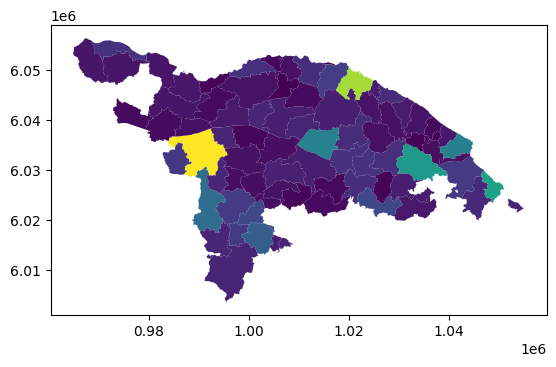

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Set up pyplot
fig, ax = plt.subplots()

# Plot geometry and color by column 'einwohner'
joined.plot("einwohner", ax=ax)

# Show!
plt.show()